In [19]:
import random

from skimage.measure import find_contours
import cv2
import numpy as np

import matplotlib.pyplot as plt

In [82]:
image = cv2.imread("training_data/image_1.png", cv2.IMREAD_GRAYSCALE)

In [114]:
def floodfill(image: np.ndarray, y: int, x: int, processed: set) -> list:
    pixels_to_process = [(y, x)]
    particle = set()
    while pixels_to_process:
        y, x = pixels_to_process.pop(0)
        if (y, x) not in particle and image[y, x]:
            particle.add((y, x))
            if y - 1 >= 0:
                pixels_to_process.append((y - 1, x))
            if y + 1 < image.shape[0]:
                pixels_to_process.append((y + 1, x))
            if x - 1 >= 0:
                pixels_to_process.append((y, x - 1))
            if x + 1 < image.shape[1]:
                pixels_to_process.append((y, x + 1))
    processed.update(particle)
    return list(particle)


def extract_particles(image: np.ndarray) -> list:
    particles = []
    processed = set()
    for y in range(image.shape[0]):
        for x in range(image.shape[1]):
            if (y, x) not in processed and image[y, x]:
                particles.append(floodfill(image, y, x, processed))
    return particles


def extract_contours(image: np.ndarray) -> list:
    contours, _ = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    return [c.squeeze() for c in contours]


def compute_particle_areas(particles: list) -> list:
    areas = []
    for particle in particles:
        areas.append(len(particle))
    return areas


def euclidean_distance(p1: np.ndarray, p2: np.ndarray) -> float:
    return np.sqrt(np.sum(np.power(p2 - p1, 2)))


def compute_contour_lengths(contours: list) -> list:
    lengths = []
    for contour in contours:
        length = 0
        for index in range(contour.shape[0] - 1):
            length += euclidean_distance(contour[index], contour[index + 1])
        length += euclidean_distance(contour[-1], contour[0])
        lengths.append(length)
    return lengths

compute_contour_lengths(contours)

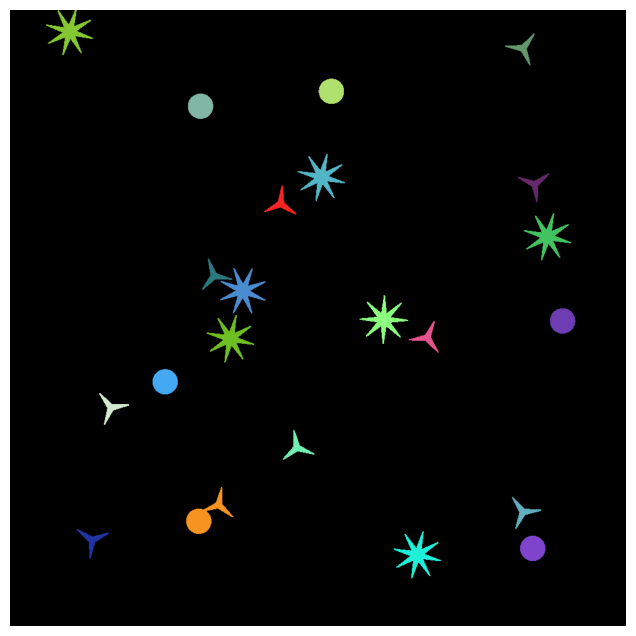

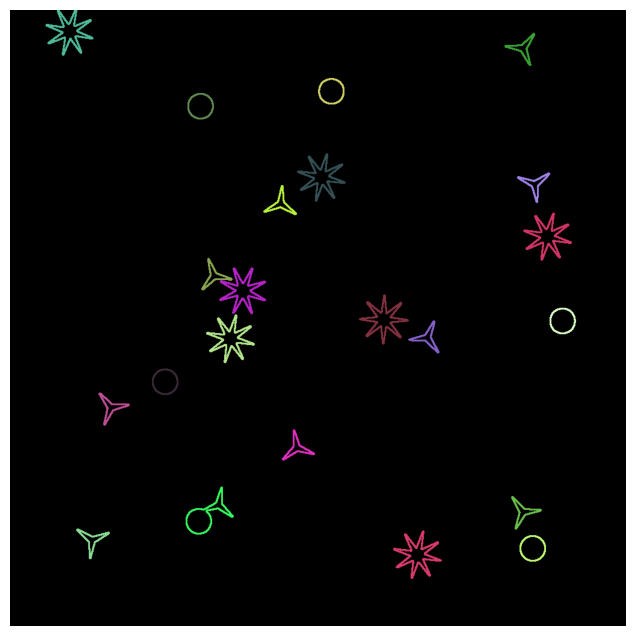

In [94]:
particles = extract_particles(image)
contours = extract_contours(image)

im = np.zeros((1024, 1024, 3), np.uint8)
for particle in particles:
    b, g, r = random.randint(30, 255), random.randint(30, 255), random.randint(30, 255)
    for y, x in particle:
        im[y, x] = (b, g, r)

plt.figure(figsize=(8, 8))
plt.axis("off")
plt.imshow(im, cmap="gray")
plt.show()

im = np.zeros((1024, 1024, 3), np.uint8)
for c in contours:
    b, g, r = random.randint(30, 255), random.randint(30, 255), random.randint(30, 255)
    im = cv2.drawContours(im, [c], 0, (b, g, r), 2)

plt.figure(figsize=(8, 8))
plt.axis("off")
plt.imshow(im, cmap="gray")
plt.show()

In [98]:
compute_particle_areas(particles)

[1762,
 573,
 1398,
 1402,
 1760,
 575,
 578,
 1762,
 570,
 1768,
 1759,
 1398,
 1764,
 576,
 1395,
 584,
 577,
 1961,
 577,
 584,
 1758,
 1396]

In [101]:
(contours[0])

array([[864, 874],
       [863, 875],
       [861, 875],
       [860, 876],
       [859, 876],
       [858, 877],
       [857, 877],
       [851, 883],
       [851, 884],
       [850, 885],
       [850, 886],
       [849, 887],
       [849, 889],
       [848, 890],
       [848, 899],
       [849, 900],
       [849, 902],
       [850, 903],
       [850, 904],
       [851, 905],
       [851, 906],
       [857, 912],
       [858, 912],
       [859, 913],
       [860, 913],
       [861, 914],
       [863, 914],
       [864, 915],
       [873, 915],
       [874, 914],
       [876, 914],
       [877, 913],
       [878, 913],
       [879, 912],
       [880, 912],
       [886, 906],
       [886, 905],
       [887, 904],
       [887, 903],
       [888, 902],
       [888, 900],
       [889, 899],
       [889, 890],
       [888, 889],
       [888, 887],
       [887, 886],
       [887, 885],
       [886, 884],
       [886, 883],
       [880, 877],
       [879, 877],
       [878, 876],
       [877,